# Introduction to Automation with LangChain, Generative AI, and Python
**Lab 1: LLM Assisted Development**
* Instructor: [Jeff Heaton](https://youtube.com/@HeatonResearch), WUSTL Center for Analytics and Business Insight (CABI), [Washington University in St. Louis](https://olin.wustl.edu/faculty-and-research/research-centers/center-for-analytics-and-business-insight/index.php)
* For more information visit the [class website](https://github.com/jeffheaton/cabi_genai_automation).

## Instructions

Given an image such as this:

[https://data.heatonresearch.com/images/wustl/data/AdobeStock_319245189-low.jpg](https://data.heatonresearch.com/images/wustl/data/AdobeStock_319245189-low.jpg)

![Source Image](https://data.heatonresearch.com/images/wustl/data/AdobeStock_319245189-low.jpg)

Produce an image like this. Pixel sizes of the thumbnail tiles the same as below. Aspect ratio,
same as below:

![Arranged Faces](https://s3.amazonaws.com/data.heatonresearch.com/wustl/CABI/genai-langchain/arranged_faces.jpg)

[Source](https://s3.amazonaws.com/data.heatonresearch.com/wustl/CABI/genai-langchain/arranged_faces.jpg)

Produce a prompt that generates code to accomplish this task. Use [Claude 3 Sonnet](https://us-east-1.console.aws.amazon.com/bedrock/home?region=us-east-1#/providers?model=anthropic.claude-3-sonnet-20240229-v1:0) to produce this.

## Small Hint

The LLM will often use OpenCV2 in this solution. OpenCV2 uses a non-standard RGB ordering, so its easy to end up with a blue tint, such as this. This is a common OpenCV2 newb mistake that LLM's often fall into.

![OpenCV Error](https://s3.amazonaws.com/data.heatonresearch.com/wustl/CABI/genai-langchain/arranged_faces_blue.jpg)

## Solution

I used the following prompt:

```
Given this URL: https://data.heatonresearch.com/images/wustl/data/AdobeStock_319245189-low.jpg Write a Python program that will download an image from that URL, detect any faces that are in that image then scale/crop those images down to 64x64. Arrange them into a square grid and display this grid to a Jupyter notebook output. Try to eliminate any false positives, but also generalize to any image with faces. It is an error if no faces are in the image. Do not have any space between images, the final image height/width should be a multiple of 64. If you choose to use OpenCV2 and do not forget to account for non-standard RGB ordering in CV2.
```

To produce this code:

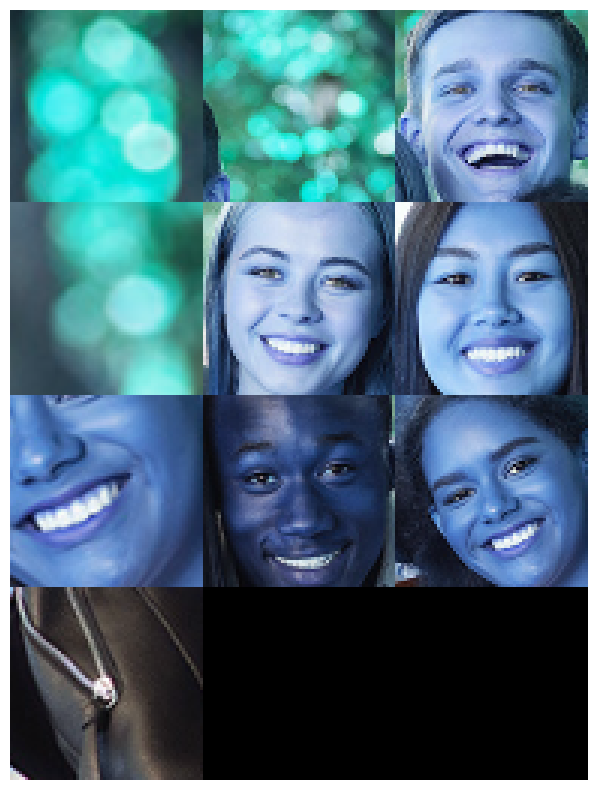

In [6]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# URL of the image
image_url = "https://data.heatonresearch.com/images/wustl/data/AdobeStock_319245189-low.jpg"

# Download the image from the URL
with urllib.request.urlopen(image_url) as url:
    image_data = url.read()

# Convert the image data to a NumPy array
image_array = np.asarray(bytearray(image_data), dtype=np.uint8)

# Decode the image data using OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert the image to RGB format (OpenCV uses BGR by default)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=1, minSize=(30, 30))

# Check if any faces were detected
if len(faces) == 0:
    raise ValueError("No faces detected in the image.")

# Create a list to store the cropped and resized face images
face_images = []

# Loop through the detected faces and crop and resize them
for (x, y, w, h) in faces:
    face_image = image[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (64, 64))
    face_images.append(face_image)

# Calculate the number of rows and columns needed to arrange the face images in a square grid
num_faces = len(face_images)
num_rows = int(np.ceil(np.sqrt(num_faces)))
num_cols = int(np.ceil(num_faces / num_rows))

# Create a blank canvas to arrange the face images
canvas_height = num_rows * 64
canvas_width = num_cols * 64
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Arrange the face images in the canvas
row = 0
col = 0
for i, face_image in enumerate(face_images):
    canvas[row*64:(row+1)*64, col*64:(col+1)*64] = face_image
    col += 1
    if col >= num_cols:
        col = 0
        row += 1

# Display the canvas in a Jupyter notebook
plt.figure(figsize=(10, 10))
plt.imshow(canvas)
plt.axis('off')
plt.show()